Business Understanding:


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data and see what we have
filename = r"C:\DataMining\flight-delays\flights.csv"
df = pd.read_csv(filename, dtype=object)

# THIS LINE FOR DEVELOPMENT OF PLOTS COMMENT OUT FOR FINAL PRESENTATION
df = df.sample(frac=0.1)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
YEAR                   object
MONTH                  object
DAY                    object
DAY_OF_WEEK            object
AIRLINE                object
FLIGHT_NUMBER          object
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    object
DEPARTURE_TIME         object
DEPARTURE_DELAY        object
TAXI_OUT               object
WHEELS_OFF             object
SCHEDULED_TIME         object
ELAPSED_TIME           object
AIR_TIME               object
DISTANCE               object
WHEELS_ON              object
TAXI_IN                object
SCHEDULED_ARRIVAL      object
ARRIVAL_TIME           object
ARRIVAL_DELAY          object
DIVERTED               object
CANCELLED              object
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       object
SECURITY_DELAY         object
AIRLINE_DELAY          object
LATE_AIRCRAFT_DEL

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,0005,...,0408,-22,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,0010,...,0741,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,0020,...,0811,5,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,0020,...,0756,-9,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,0025,...,0259,-21,0,0,NaN,NaN,NaN,NaN,NaN,NaN


We need to clean up the data

In [4]:
# Drop unrelated variables.  We are not interested in the stages of getting to an airport as we
# are more focused on whether or not a flight was cancelled
df = df.drop(columns=["TAXI_OUT", "WHEELS_OFF", "AIR_TIME", "WHEELS_ON", "TAXI_IN"])

In [5]:
# Add 0 padding for the datetime transformation
df["MONTH"] = df["MONTH"].apply(lambda s: s.zfill(2))
df["DAY"] = df["DAY"].apply(lambda s: s.zfill(2))

# Change Scheduled_departure to Datetime
df["SCHEDULED_DEPARTURE"] = pd.to_datetime(df["YEAR"]+df["MONTH"]+df["DAY"]+df["SCHEDULED_DEPARTURE"], format="%Y%m%d%H%M")

# We need to take into account the departure delay when converting DEPARTURE TIME to datetime
df["DEPARTURE_DELAY"] = pd.to_timedelta(df["DEPARTURE_DELAY"]+"m", errors="coerce")

# Now that we have a time delta we can simply add scheduled departure to Departure Delay
# to get a datetime object for Departure Time
df["DEPARTURE_TIME"] = df["DEPARTURE_DELAY"] + df["SCHEDULED_DEPARTURE"]

In [6]:
# We follow the same logic for Scheduled time to Scheduled Arrival time
df["SCHEDULED_TIME"] = pd.to_timedelta(df["SCHEDULED_TIME"]+"m", errors="coerce")
df["SCHEDULED_ARRIVAL"] = df["SCHEDULED_TIME"] + df["SCHEDULED_DEPARTURE"]

# And Arrival time
df["ELAPSED_TIME"] = pd.to_timedelta(df["ELAPSED_TIME"] + "m", errors="coerce")
df["ARRIVAL_DELAY"] = pd.to_timedelta(df["ARRIVAL_DELAY"] + "m", errors="coerce")
# We could also calculate with Elapsed time + departure time
df["ARRIVAL_TIME"] = df["ARRIVAL_DELAY"] + df["SCHEDULED_ARRIVAL"]

In [8]:
# Clean the rest of the Delay Variables
df["AIR_SYSTEM_DELAY"] = pd.to_timedelta(df["AIR_SYSTEM_DELAY"] + "m", errors="coerce")
df["SECURITY_DELAY"] = pd.to_timedelta(df["SECURITY_DELAY"] + "m", errors="coerce")
df["AIRLINE_DELAY"] = pd.to_timedelta(df["AIRLINE_DELAY"] + "m", errors="coerce")
df["LATE_AIRCRAFT_DELAY"] = pd.to_timedelta(df["LATE_AIRCRAFT_DELAY"] + "m", errors="coerce")
df["WEATHER_DELAY"] = pd.to_timedelta(df["WEATHER_DELAY"] + "m", errors="coerce")

In [9]:
# Now let's see our variables and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 26 columns):
YEAR                   object
MONTH                  object
DAY                    object
DAY_OF_WEEK            object
AIRLINE                object
FLIGHT_NUMBER          object
TAIL_NUMBER            object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE    datetime64[ns]
DEPARTURE_TIME         datetime64[ns]
DEPARTURE_DELAY        timedelta64[ns]
SCHEDULED_TIME         timedelta64[ns]
ELAPSED_TIME           timedelta64[ns]
DISTANCE               object
SCHEDULED_ARRIVAL      datetime64[ns]
ARRIVAL_TIME           datetime64[ns]
ARRIVAL_DELAY          timedelta64[ns]
DIVERTED               object
CANCELLED              object
CANCELLATION_REASON    object
AIR_SYSTEM_DELAY       timedelta64[ns]
SECURITY_DELAY         timedelta64[ns]
AIRLINE_DELAY          timedelta64[ns]
LATE_AIRCRAFT_DELAY    timedelta64[ns]
WEATHER_DELAY          timedelta6

In [94]:
df_test = df.head()
# pd.to_timedelta(df_test["DEPARTURE_DELAY"]+"m", errors="coerce")
# np.timedelta64(df_test["DEPARTURE_DELAY"], "m")
df_test["DEPARTURE_DELAY"] + df_test["SCHEDULED_DEPARTURE"]

0   2014-12-31 23:54:00
1   2015-01-01 00:02:00
2   2015-01-01 00:18:00
3   2015-01-01 00:15:00
4   2015-01-01 00:24:00
dtype: datetime64[ns]

In [92]:
df_missingDelays = df[df["DEPARTURE_DELAY"].isnull()]
# astype(np.int64)
df_missingDelays[["SCHEDULED_DEPARTURE", "DEPARTURE_TIME", "CANCELLED"]].head()
df["SCH_DEP_DT"].head()
df_test[["DEPARTURE_DELAY", "SCHEDULED_DEPARTURE"]].head()

,DEPARTURE_DELAY,SCHEDULED_DEPARTURE
0,-11,0005
1,-8,0010
2,-2,0020
3,-5,0020
4,-1,0025


In [73]:
df_cancelled = df.loc[df["CANCELLED"] == "1"]
df_cancelled.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SCH_DEP_DT
32,2015,01,01,4,AS,136,N431AS,ANC,SEA,0135,...,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,2015-01-01 01:35:00
42,2015,01,01,4,AA,2459,N3BDAA,PHX,DFW,0200,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,2015-01-01 02:00:00
68,2015,01,01,4,OO,5254,N746SK,MAF,IAH,0510,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,2015-01-01 05:10:00
82,2015,01,01,4,MQ,2859,N660MQ,SGF,DFW,0525,...,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN,2015-01-01 05:25:00
90,2015,01,01,4,OO,5460,N583SW,RDD,SFO,0530,...,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN,2015-01-01 05:30:00


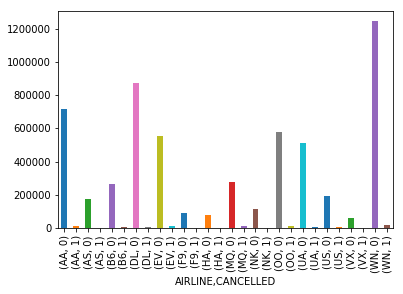

In [81]:
# df["CANCELLED"].value_counts().plot(kind="bar")
df.groupby(by="AIRLINE").CANCELLED.value_counts().plot(kind="bar")

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


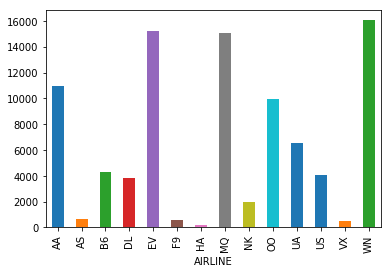

In [75]:
df_cancelled["CANCELLED"] = df_cancelled["CANCELLED"].astype(np.int64)
df_cancelled.groupby(by=["AIRLINE"]).CANCELLED.sum().plot(kind="bar")
# ad = airline_data.DISTANCE.sum()
# adp = ad.plot(kind="bar")

In [62]:
df_temp = df[["SCHEDULED_DEPARTURE", "YEAR", "MONTH", "DAY"]].head()
df_temp3 = df[["SCHEDULED_DEPARTURE", "YEAR", "MONTH", "DAY"]].head()
df_temp3 = df_temp3[["MONTH", "DAY"]].apply(lambda s: s.str.zfill(2))
# df_temp = df_temp[["YEAR", "MONTH", "DAY", "SCHEDULED_DEPARTURE"]].astype(np.int64)
# tlength = 1000
# mlength = 100*dlength
# dlength = 100*tlength
# df_temp2 = df_temp["YEAR"]*mlength + df_temp["MONTH"]*dlength + df_temp["DAY"]*tlength + df_temp["SCHEDULED_DEPARTURE"]
# pd.to_datetime(df_temp, format="%Y%m%d%H%M")
df_temp3.head()

,MONTH,DAY
0,01,01
1,01,01
2,01,01
3,01,01
4,01,01


In [43]:
df_temp.head()
pd.to_datetime(df_temp["SCHEDULED_DEPARTURE"], format="%H%M")

0   1900-01-01 00:05:00
1   1900-01-01 00:10:00
2   1900-01-01 00:20:00
3   1900-01-01 00:20:00
4   1900-01-01 00:25:00
Name: SCHEDULED_DEPARTURE, dtype: datetime64[ns]

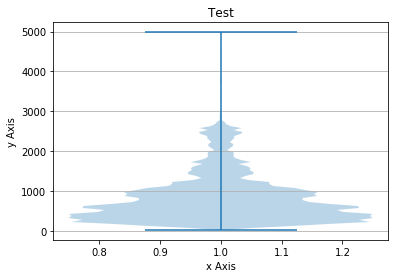

In [8]:
fig, axes = plt.subplots()
axes.violinplot(dataset=df["DISTANCE"])
axes.set_title("Test")
axes.yaxis.grid(True)
axes.set_xlabel('x Axis')
axes.set_ylabel('y Axis')

plt.show()

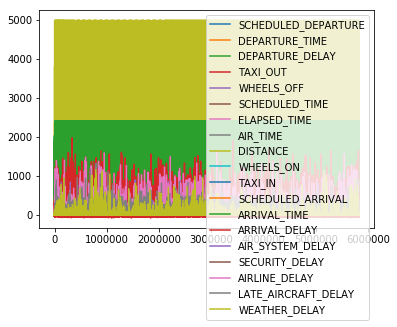

In [9]:
df[CONTINUOUS_VARIABLES].plot()

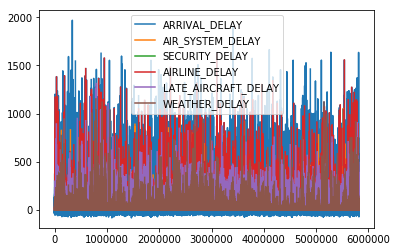

In [10]:
delay_times = df[DELAY_VARIABLES]
delay_times.plot()

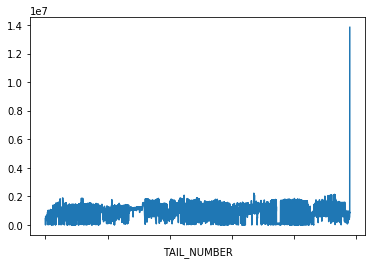

In [14]:
total_flight_distance = df[["DISTANCE"] + IDENTIFICATION_VARIABLES].groupby(by="TAIL_NUMBER")
tfd = total_flight_distance.DISTANCE.sum()
ax = tfd.plot()

In [15]:
df.AIRLINE.nunique()

14

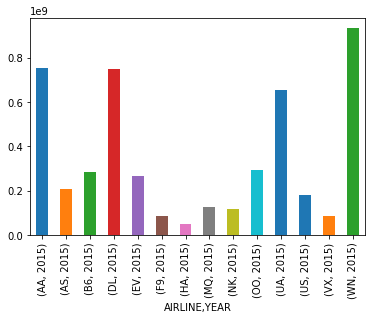

In [19]:
airline_data = df.groupby(by=["AIRLINE"])
ad = airline_data.DISTANCE.sum()
adp = ad.plot(kind="bar")

In [69]:
df_cancelled.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,SCH_DEP_DT
